In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# **Understanding Data**

In [45]:
df = pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [47]:
df.shape

(2392, 15)

In [48]:
df.drop(['StudentID', 'GPA'], axis=1, inplace=True)

In [49]:
df.shape

(2392, 13)

In [50]:
n_cols = [col for col in df.columns if df[col].nunique() > 5]

c_cols = df.columns.difference(n_cols).difference(['GradeClass']).to_list()

print(c_cols)

['Age', 'Ethnicity', 'Extracurricular', 'Gender', 'Music', 'ParentalEducation', 'ParentalSupport', 'Sports', 'Tutoring', 'Volunteering']


# **Data Visualization**

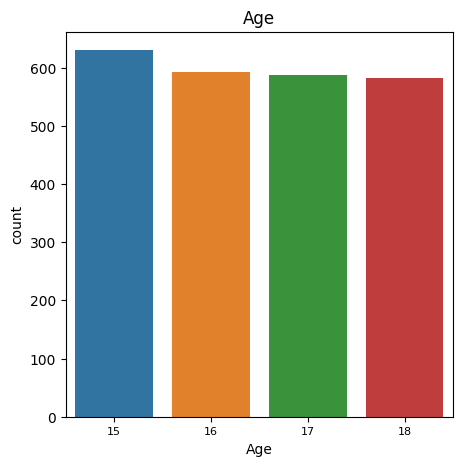

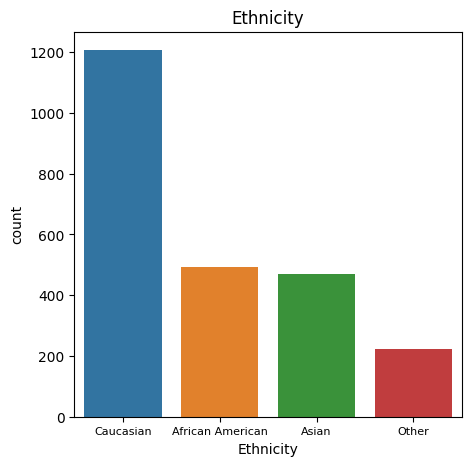

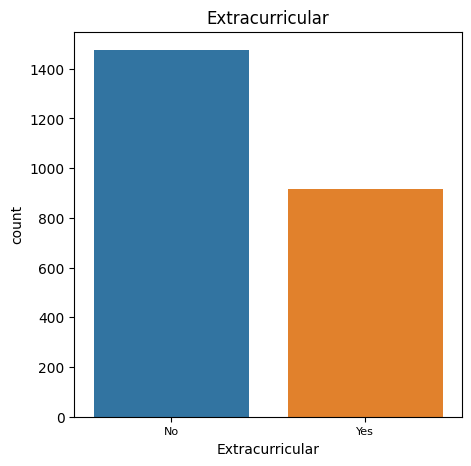

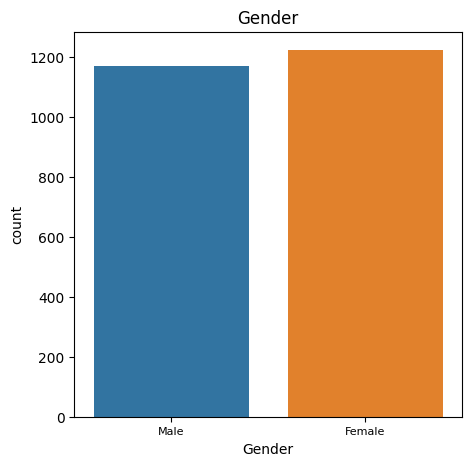

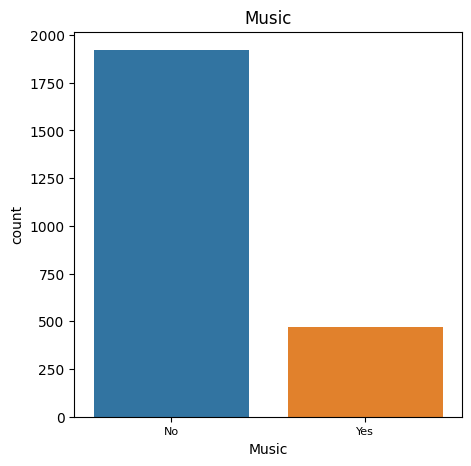

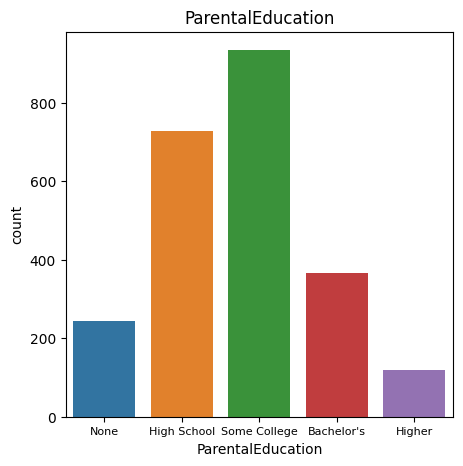

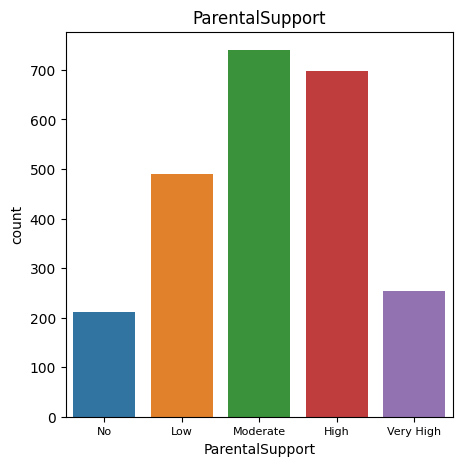

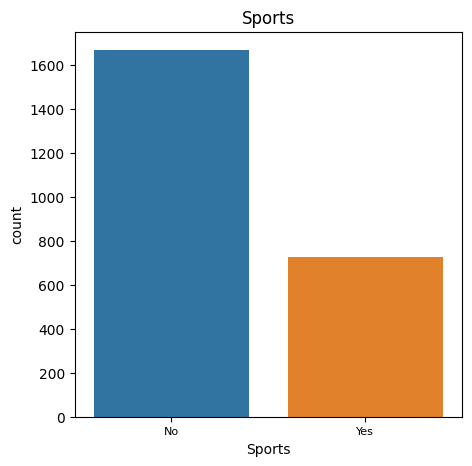

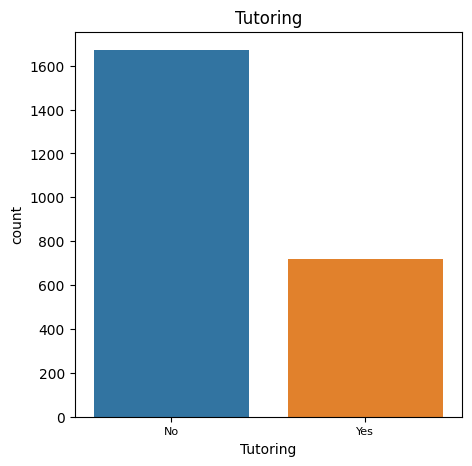

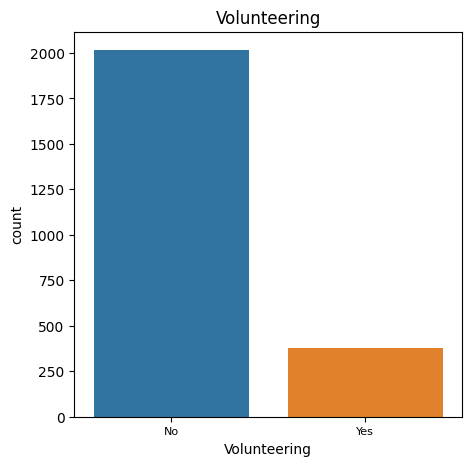

In [51]:
custom_labels = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Age': [15, 16, 17, 18],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female']
}

for col in c_cols : 
    plt.figure(figsize=(5, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'{col}')
    labels = custom_labels[col]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels, fontsize=8)
    plt.show()
    
    

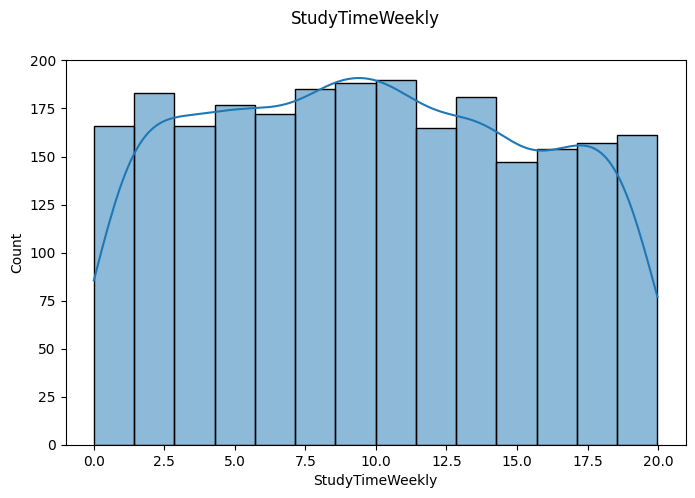

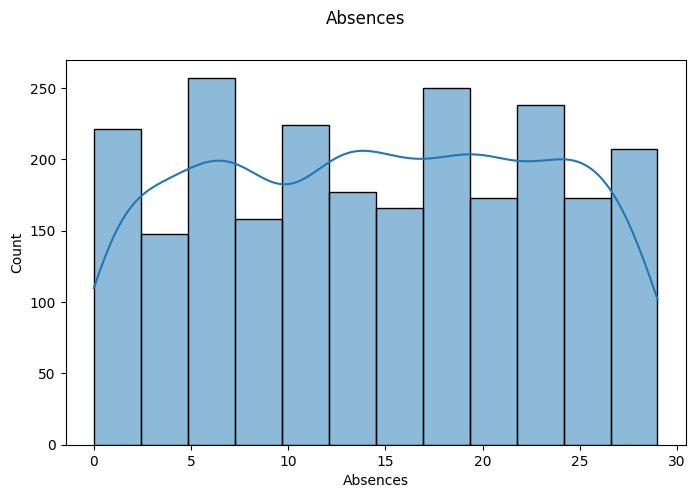

In [52]:
for col in n_cols :
    q75, q25 = np.percentile(df[col], [75 ,25])
    iqr = q75 - q25
    bin_width = 2 * iqr * len(df[col])**(-1/3)
    num_bins_fd = int((df[col].max() - df[col].min()) / bin_width)
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=num_bins_fd)
    plt.suptitle(f'{col}')
    plt.show()
    

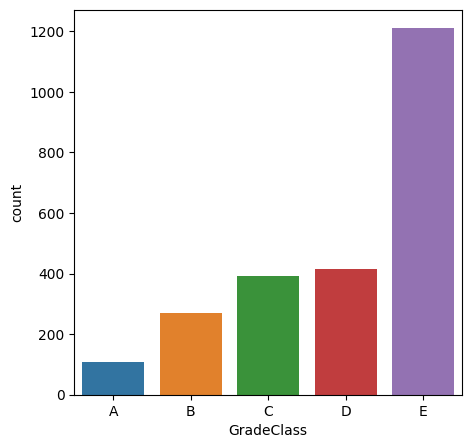

In [53]:
labels = ['A', 'B',  'C', 'D', 'E']
ticks = range(len(labels))

plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='GradeClass')
plt.xticks(ticks=ticks, labels=labels)
plt.show()

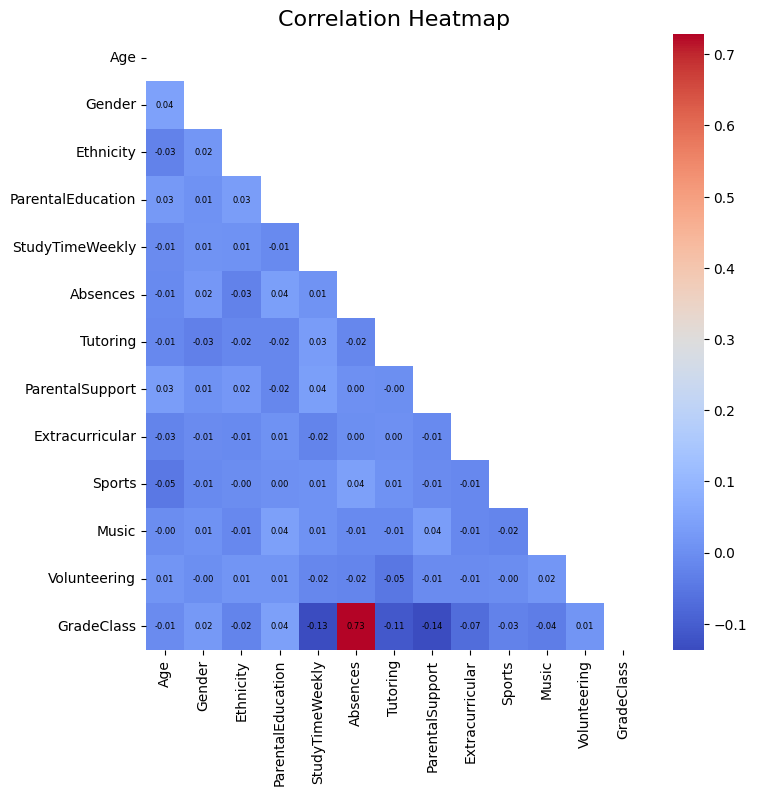

In [54]:
corr_matrix = df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(8, 8))
sns.heatmap(data=corr_matrix, mask=mask, cmap='coolwarm', annot=True,fmt=".2f",  annot_kws={"size": 6, "color": "black"})
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

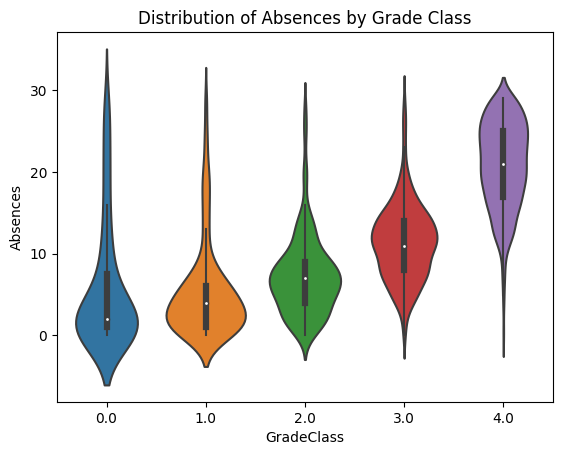

In [55]:
sns.violinplot(data=df, x='GradeClass', y='Absences')
plt.title("Distribution of Absences by Grade Class")
plt.show()

# **Data Preprocessing**

In [56]:
X = df.loc[:, df.columns != "GradeClass"]
y = df.GradeClass

In [57]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1, stratify=y)

# **Modeling**

In [59]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(),
}

In [60]:
models_name = []
cost = []

for name, model in models.items() : 
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    models_name.append(name)
    cost.append(score)
    print(name, '=', score)
    
    

Decision Tree = 0.6253481894150418
Random Forest = 0.7103064066852368
Gradient Boosting = 0.7270194986072424
K-Nearest Neighbors = 0.575208913649025
Logistic Regression = 0.7019498607242339
XGBoost = 0.7089136490250696


In [61]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)




Classification Report:
              precision    recall  f1-score   support

         0.0       0.25      0.31      0.28        32
         1.0       0.42      0.35      0.38        81
         2.0       0.47      0.48      0.47       117
         3.0       0.41      0.40      0.41       124
         4.0       0.82      0.83      0.82       364

    accuracy                           0.62       718
   macro avg       0.47      0.47      0.47       718
weighted avg       0.62      0.62      0.62       718

